# Punto 1

## Problema Primal
A continuación, se muestra el problema en forma estándar:
Las variables de decisión son: $x_{1}$ y $x_{2}$ que corresponde a las bolsas de golf estándar y deluxe, respectivamente:

$máx\ 7x_{1}+9x_{2}$\
sujeto a

$\frac{7}{10}x_{1}+1x_{2} \leq 630$\
$\frac{1}{2}x_{1}+ \frac{5}{6}x_{2} \leq 600$\
$x_{1}+ \frac{2}{3}x_{2} \leq 708$\
$\frac{1}{10}x_{1}+ \frac{1}{4}x_{2} \leq 135$\
$x_{1},x_{2} \geq 0$

Y, convirtiendolo a forma estándar, tenemos:

$mín\ -7x_{1}-9x_{2}$\
sujeto a

$\frac{7}{10}x_{1}+1x_{2}+y_{1} = 630$\
$\frac{1}{2}x_{1}+ \frac{5}{6}x_{2}+y_{2} = 600$\
$x_{1}+ \frac{2}{3}x_{2}+y_{3} = 708$ \
$\frac{1}{10}x_{1}+ \frac{1}{4}x_{2}+y_{4} = 135$\
$x_{1},x_{2} \geq 0$

In [22]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [-7, -9, 0, 0, 0, 0]
# Coeficientes de las restricciones (matriz A y vector b)
A = [[7/10,1,1,0,0,0],[1/2,5/6,0,1,0,0],[1,2/3,0,0,1,0],[1/10,1/4,0,0,0,1]]
b = [630, 600, 708, 135]

# Límites de las variables (x1, x2)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
x5_bounds = (0, None)


# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex y opciones de visualización
resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds], method='revised simplex', options=options)

# Mostrar resultados
print("Valor Máximo de la Función Objetivo:", -resultado.fun)
print("Argumentos Óptimos:", resultado.x)

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  0.0                 0.0                 
Phase Iteration Minimum Slack       Constraint Residual Objective          
2     0         NA                  0.0                 0.0                 
2     1         NA                  0.0                 -4860.0             
2     2         NA                  0.0                 -5880.0             
2     3         NA                  0.0                 -6048.0             
Optimization terminated successfully.
         Current function value: -6048.000000
         Iterations: 3
Valor Máximo de la Función Objetivo: 6048.0
Argumentos Óptimos: [540. 252.   0. 120.   0.  18.]


<ipython-input-22-b21d24a29f71>:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds], method='revised simplex', options=options)


## Problema Dual

El problema dual se plantea siguiendo las reglas de conversión como sigue:

$min$ ${630\lambda_1 + 600\lambda_2 + 708\lambda_3 + 135\lambda_4}$
\
sujeto a
\
$\frac{7}{10} \lambda_1 + \frac{1}{2} \lambda_2 + \lambda_3 + \frac{1}{10}\lambda_4 \geq 7$
\
$\lambda_1 + \frac{5}{6} \lambda_2 + \frac{2}{3} \lambda_3 + \frac{1}{4}\lambda_4 \geq 9$
\
$\lambda_1, \lambda_2 \geq 0$


\
Se pasa en forma estándar de la siguiente manera:

$min$ ${630\lambda_1 + 600\lambda_2 + 708\lambda_3 + 135\lambda_4}$
\
sujeto a
\
$\frac{7}{10} \lambda_1 + \frac{1}{2} \lambda_2 + \lambda_3 + \frac{1}{10}\lambda_4 - s_1 = 7$
\
$\lambda_1 + \frac{5}{6} \lambda_2 + \frac{2}{3} \lambda_3 + \frac{1}{4}\lambda_4 - s_2 = 9$
\
$\lambda_1, \lambda_2, s_1, s_2 \geq 0$


\
A pesar de que se podría resolver el problema dual directamente, se recurrirá al **Teorema de Equilibrio** (también llamado Condiciones de Holgura Complementaria) para encontrar la solución del dual:

La solución del problema primal es $(x_1, x_2) = (540, 252)$. Reemplazamos en las restricciones del primal para verificar la holgura:

* $\frac{7}{10}(540) + (252) = 630$ **= 630**
* $\frac{1}{2}(540) + \frac{5}{6}(252) = 480$ **< 600**
* $(540) + \frac{2}{3}(252) = 708$ **= 708**
* $\frac{1}{10}(540) + \frac{1}{4}(252) = 117$ **< 135**

A partir de las condiciones de holgura complementaria, si $(A\vec{x})_i \neq b_i \Rightarrow \lambda_i = 0$. Por lo tanto, $\lambda_2 = 0, \lambda_4 = 0$.

Debido a lo anterior, empleamos las restricciones del dual para encontrar los valores de las otras variables duales:

$\begin{bmatrix}
\frac{7}{10} & 1\\
1 & \frac{2}{3}
\end{bmatrix}
\begin{bmatrix}
\lambda_1 \\ \lambda_3
\end{bmatrix} =
\begin{bmatrix}
7 \\ 9
\end{bmatrix}$



In [ ]:
import numpy as np

holgada = np.array([[7/10, 1], [1, 2/3]])
valores = np.array([7, 9])
lambdas = np.linalg.solve(holgada, valores)

print(lambdas)

[8.125  1.3125]


La solución del problema dual es, entonces:
$\lambda_1 = 8.125, \lambda_2 = 0, \lambda_3 = 1.3125, \lambda_4 = 0$


Calculamos el valor del óptimo, evaluando la función objetivo dual en esos valores. El óptimo es 6048, igual al del primal, por lo cual hemos llegado a la solución del dual.

In [ ]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [630, 600, 708, 135, 0, 0]
# Coeficientes de las restricciones (matriz A y vector b)
A = [[7/10, 1/2, 1, 1/10, -1, 0], [1, 5/6, 2/3, 1/4, 0, -1]]
b = [7, 9]

# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex y opciones de visualización
resultado = linprog(c, A_eq=A, b_eq=b, bounds=[(0, None) for _ in range(len(c))], method='simplex', options=options)

# Mostrar resultados
print("Valor Mínimo de la Función Objetivo:", resultado.fun)
print("Argumentos Óptimos:", resultado.x)

Optimization terminated successfully.
         Current function value: 6048.000000 
         Iterations: 3
Valor Mínimo de la Función Objetivo: 6048.0
Argumentos Óptimos: [8.125  0.     1.3125 0.     0.     0.    ]


<ipython-input-9-7870786404d4>:13: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A_eq=A, b_eq=b, bounds=[(0, None) for _ in range(len(c))], method='simplex', options=options)


## Problema visto gráficamente.

A continuación, se muestra la región factible del problema primal y además, el óptimo ubicado en una de las esquinas de dicha región:

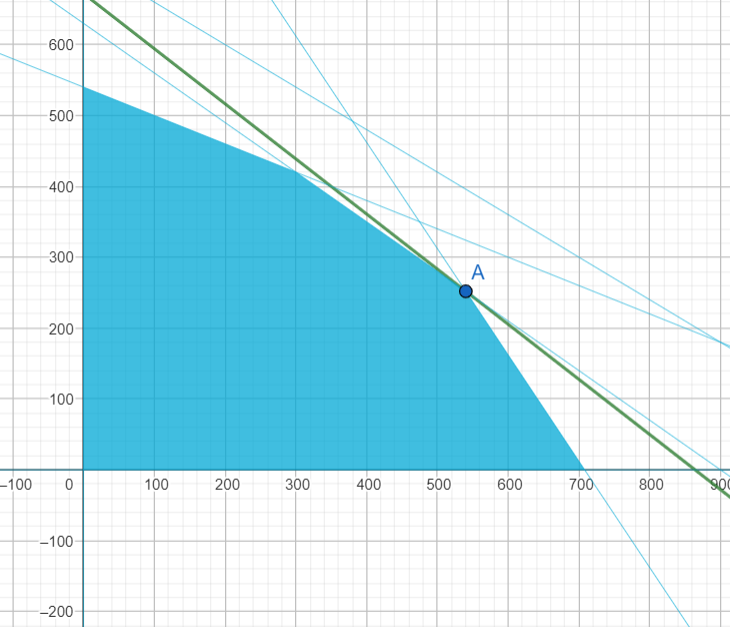

En la imagen anterior, la región en azul se refiere a la región factible del problema de optimización. Y en verde se muestra la función objetivo en su valor óptimo.

## Preguntas sobre Dualidad

Como se tiene un $\Delta \vec{b}$ muy pequeño y $B$ no cambia, esto quiere decir que el sistema primal es de la forma:

$min$ $\vec{c}^T \vec{x}$
\
sujeto a
\
$A\vec{x} = \vec{b}+\Delta\vec{b}$

$\vec{x} \geq 0$

donde la base es la que genera las soluciones del problema primal en forma estándar, $B=\begin{bmatrix}\vec{a}_1 & \vec{a}_2 & \vec{y}_2 & \vec{y}_4\end{bmatrix}$.

In [3]:
import numpy as np

c_base = np.array([7, 9, 0, 0])
base = np.array([[7/10, 1, 0, 0], [1/2, 5/6, 1, 0], [1, 2/3, 0, 0], [1/10, 1/4, 0, 1]])
lambda_transpuesta = np.matmul(c_base, np.linalg.inv(base))

print(lambda_transpuesta)

[8.125  0.     1.3125 0.    ]


Lo importante acá es que cada uno de los elementos en el vector $\vec{\lambda}$, notado como $\lambda_i$ establece la sensitividad (o cuánto varía la función objetivo) en correspondencia con el cambio en $b_i$. Además, como estos se relacionan con cada restricción, esto implica que un cambio pequeño en $b_1$ y en $b_3$ generan cambios grandes en la función objetivo.

En particular, genera cambios positivos en ambos casos. Como la función es una función de maximización, lo ideal sería enfocarse en dichos casos. Por ende, las restricciones que a las se deberían incrementar las horas máximas son la primera y la tercera.

Es decir, se debería destinar el equipo adicional para incrementar las horas de trabajo en **Corte y Teñido** y **Terminado**.

El precio excedente que se tendría que pagar estaría dado por la fórmula:

$$Precio = \lambda_1 \Delta b_1 + \lambda_2 \Delta b_2 = 8.135\Delta b_1 + 1.3125\Delta b_3$$


# Punto 2

## Primera Estrategia

Se plantea el nuevo problema de optimización considerando que el cambio es un mejoramiento del 10% en los tiempos de producción (es decir, tendrán el 0.9 de su valor original). Cabe resaltar que, aunque los tiempos de producción disminuyan, no tiene por qué cambiar la cantidad de horas disponibes en total. Así mismo, las variables de decisión siguen siendo las mismas, así como la función objetivo:

$máx\ 7x_{1}+9x_{2}$\
sujeto a

$\frac{63}{100}x_{1}+\frac{9}{10}x_{2} \leq 630$\
$\frac{9}{20}x_{1}+ \frac{3}{4}x_{2} \leq 600$\
$\frac{9}{10}x_{1}+ \frac{3}{5}x_{2} \leq 708$\
$\frac{9}{100}x_{1}+ \frac{9}{40}x_{2} \leq 135$\
$x_{1},x_{2} \geq 0$

Y, convirtiendolo a forma estándar, tenemos:

$mín\ -7x_{1}-9x_{2}$\
sujeto a

$\frac{63}{100}x_{1}+\frac{9}{10}x_{2} + y_1 = 630$\
$\frac{9}{20}x_{1}+ \frac{3}{4}x_{2} + y_2 = 600$\
$\frac{9}{10}x_{1}+ \frac{3}{5}x_{2} + y_3 = 708$\
$\frac{9}{100}x_{1}+ \frac{9}{40}x_{2} + y_4 = 135$\
$x_{1},x_{2} \geq 0$

In [26]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [-7, -9, 0, 0, 0, 0]
# Coeficientes de las restricciones (matriz A y vector b)
A = [[63/100,9/10,1,0,0,0],[9/20,3/4,0,1,0,0],[9/10,3/5,0,0,1,0],[9/100,9/40,0,0,0,1]]
b = [630, 600, 708, 135]

# Límites de las variables (x1, x2)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
x5_bounds = (0, None)


# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex y opciones de visualización
resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds], method='revised simplex', options=options)

# Mostrar resultados
print("Valor Máximo de la Función Objetivo:", -resultado.fun)
print("Argumentos Óptimos:", resultado.x)

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  0.0                 0.0                 
Phase Iteration Minimum Slack       Constraint Residual Objective          
2     0         NA                  0.0                 0.0                 
2     1         NA                  0.0                 -5400.0             
2     2         NA                  0.0                 -6533.333333333     
2     3         NA                  0.0                 -6720.0             
Optimization terminated successfully.
         Current function value: -6720.000000
         Iterations: 3
Valor Máximo de la Función Objetivo: 6720.0
Argumentos Óptimos: [600. 280.   0. 120.   0.  18.]


<ipython-input-26-004919e215d2>:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds], method='revised simplex', options=options)


## Segunda Estrategia

En esta nueva estrategia, lo que cambiará será la función objetivo puesto que es la utilidad la que incrementa y toma 1.1 veces su valor original:

$máx\ 7.7x_{1}+9.9x_{2}$\
sujeto a

$\frac{7}{10}x_{1}+1x_{2} \leq 630$\
$\frac{1}{2}x_{1}+ \frac{5}{6}x_{2} \leq 600$\
$x_{1}+ \frac{2}{3}x_{2} \leq 708$\
$\frac{1}{10}x_{1}+ \frac{1}{4}x_{2} \leq 135$\
$x_{1},x_{2} \geq 0$

Y, convirtiendolo a forma estándar, tenemos:

$mín\ -7.7x_{1}-9.9x_{2}$\
sujeto a

$\frac{7}{10}x_{1}+1x_{2}+y_{1} = 630$\
$\frac{1}{2}x_{1}+ \frac{5}{6}x_{2}+y_{2} = 600$\
$x_{1}+ \frac{2}{3}x_{2}+y_{3} = 708$ \
$\frac{1}{10}x_{1}+ \frac{1}{4}x_{2}+y_{4} = 135$\
$x_{1},x_{2} \geq 0$

In [27]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [-7.7, -9.9, 0, 0, 0, 0]
# Coeficientes de las restricciones (matriz A y vector b)
A = [[7/10,1,1,0,0,0],[1/2,5/6,0,1,0,0],[1,2/3,0,0,1,0],[1/10,1/4,0,0,0,1]]
b = [630, 600, 708, 135]

# Límites de las variables (x1, x2)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
x5_bounds = (0, None)


# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex y opciones de visualización
resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds], method='revised simplex', options=options)

# Mostrar resultados
print("Valor Máximo de la Función Objetivo:", -resultado.fun)
print("Argumentos Óptimos:", resultado.x)

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  0.0                 0.0                 
Phase Iteration Minimum Slack       Constraint Residual Objective          
2     0         NA                  0.0                 0.0                 
2     1         NA                  0.0                 -5346.0             
2     2         NA                  0.0                 -6468.0             
2     3         NA                  0.0                 -6652.8             
Optimization terminated successfully.
         Current function value: -6652.800000
         Iterations: 3
Valor Máximo de la Función Objetivo: 6652.8
Argumentos Óptimos: [540. 252.   0. 120.   0.  18.]


<ipython-input-27-ce1d922c2873>:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds], method='revised simplex', options=options)


## Conclusiones

En este caso, es preferible apostar por la primera estrategia. Esto debido a que, al tener todos los coeficientes de la matriz de las restricciones multiplicados por 0.9, esto implica que la base no cambiará, pero que los valores óptimos (que en el problema primal corresponden a la cantidad de unidades producidas de cada tipo) van a incrementar por $1/0.9 = 1.1111$.

Por otro lado, en la segunda estrategia, al no alterarse las restricciones de ninguna manera, no cambia ni la base ni la solución óptima, sólo ocurrirá que el costo incrementará por el 10%, es decir, la ganancia máxima incrementará en $1.10$.

Si se comparan ambos factores de incremento, el de la primera estrategia es mayor. De esta manera, dado que el costo en el óptimo es $6048.00$ para el problema primal original, se puede saber de antemano que el costo tras aplicar cada una de las estrategias será:

* Estrategia 1: $6720.00$
* Estrategia 2: $6652.80$

Se comprueba que la solución obtenida con Python coincide con la predicha en la teoría a partir de cómo las modificaciones alterarían la naturaleza de las soluciones óptimas, la función objetivo y/o la base.

En conclusión, si se quisiera maximizar la ganancia obtenida, la mejor alternativa es la **Primera Estrategia**.